In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.options.mode.chained_assignment = None

In [3]:
class_df.columns

Index(['Timestamp', 'Ethnicity', 'What year were you born?',
       'What is your gender?', 'What is your sexuality?',
       'Political Alignment', 'Religion', 'What's your hometown?',
       'Which country was your parent/guardian 1 born?',
       'Which country was your parent/guardian 2 born?',
       'Highest Parent Education',
       'Did at least one of your parents pursue a degree/career in STEM?',
       'Were you in a specialized high school program?',
       'What was your top 6 highschool average for engineering? Please enter just the number with NO % sign (Calc, Adv Functions, English, Physics, Chemistry, 6th course in your top 6) ',
       'What university would you go to if you were not going to Waterloo?',
       'Out of the previously mentioned universities, were you accepted or rejected from your program? If you did not apply to the university, indicate as such [Carleton University]',
       'Out of the previously mentioned universities, were you accepted or rejected 

In [ ]:
relevant_cols = ['Which round did you get your coop in?', 'Which sector was your first co-op in?']
round_coop = class_df[relevant_cols]
round_coop.head(30)

In [ ]:
round_coop = round_coop[round_coop['Which round did you get your coop in?'].notna()]
round_coop.head(30)

In [ ]:
round_coop['Which sector was your first co-op in?'] = round_coop['Which sector was your first co-op in?'].str.split(';')

round_coop = (round_coop
 .set_index(['Which round did you get your coop in?'])['Which sector was your first co-op in?']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_1', axis=1)
 .rename(columns={0:'Which sector was your first co-op in?'}))

round_coop.head(50)

In [ ]:
round_coop[round_coop['Which sector was your first co-op in?'] != 'Unhired']
round_hired_only = round_coop[round_coop['Which sector was your first co-op in?'] != 'Unhired']
round_hired_only.head(25)

In [ ]:
# checking for sectors in the first round
first_round = round_coop[round_coop['Which round did you get your coop in?'] == '1st Round']
first_round

In [ ]:
first_round['Number of people'] = first_round.groupby(['Which sector was your first co-op in?'])['Which round did you get your coop in?'].transform('count')
first_round

In [ ]:
first_round = first_round.drop_duplicates(subset=['Which round did you get your coop in?', 'Which sector was your first co-op in?', 'Number of people'], keep='first')
first_round

<AxesSubplot:title={'center':'Round 1 Co-op Sectors'}>

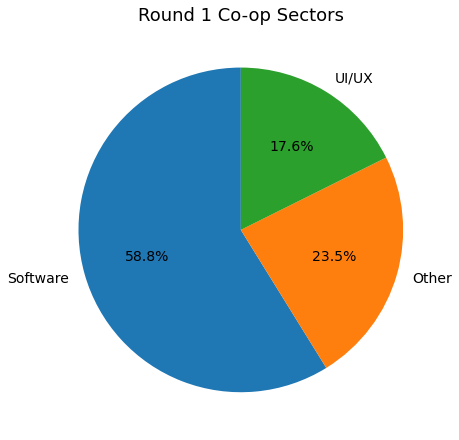

In [11]:
# displaying specific sectors that people got a coop in during the first round
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
plt.title("Round 1 Co-op Sectors", fontsize=18)
first_round.plot(kind='pie', y ='Number of people', ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, ylabel = '', labels=first_round['Which sector was your first co-op in?'], legend = False, fontsize=14)